In [1]:
import cv2
import numpy as np

### Image Resizing

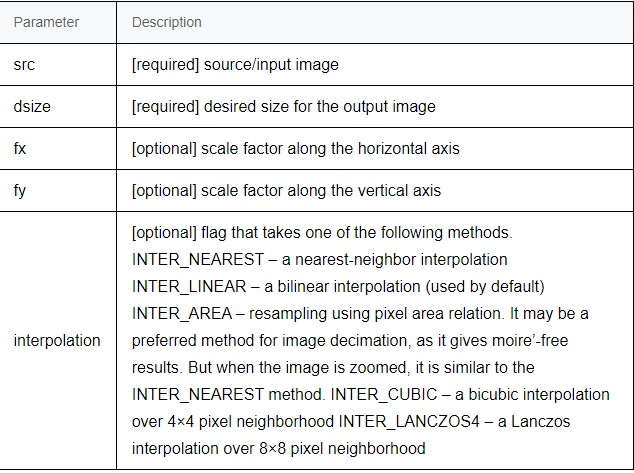

In [2]:
img = cv2.imread("Images/tomato.jpg")

half = cv2.resize(src=img, dsize=(0,0), fx=0.1, fy=0.2)

cv2.imshow("Image", half)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
bigger  = cv2.resize(src=img, dsize=(800,800))

cv2.imshow("Image", bigger )
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
stretch_near = cv2.resize(src=img, dsize=(500,450), interpolation= cv2.INTER_NEAREST)

cv2.imshow("Image", stretch_near)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Erode

OpenCV-Python is a library of Python bindings designed to solve computer vision problems. cv2.erode() method is used to perform erosion on the image. The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

### Bordering

In [7]:
img = cv2.imread("Images/girl-mask.jpg")

img = cv2.copyMakeBorder(src=img, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT, value=0)

cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
img = cv2.imread("Images/girl-mask.jpg")

img = cv2.copyMakeBorder(src=img, top=10, bottom=10, left=10, right=10,
                         borderType=cv2.BORDER_REFLECT, value=0)

cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()